###################################################<br>
title: NFL QB Predictor<br>
author: Kevin Huang<br>
date: 20170519(original date), Edits made 20180720<br>
output: Datasets used for Analysis - 6 Total Datasets<br>
Notes: Preprocessing: Exploratory Data Analysis<br>
python version: 3.6.5: Anaconda 4.3.1<br>
###################################################<br>


#### Import libraries & load dataset

In [1]:
import pandas as pd
import numpy as np
import os, sys

In [2]:
# Creating variables for the path of file
file_path = '/Users/kevin8523/Desktop/Github/nfldraft_qb_study/data_created'

# Set working directory 
os.chdir(file_path)
os.getcwd()

# Read in Data
df = pd.read_csv('Dataset_All.csv', header=0)

#### Quick sanity check of the data

In [3]:
# Shape of the data
print('\033[1m'+'DATASET','(ROWS, COLUMNS)'+'\033[0m')
print('df',df.shape)

DATASET (ROWS, COLUMNS)
df (2218, 36)


In [4]:
# df.head(), df.tail(),df.info(),df.describe()
df.head(2)

,Unnamed: 0,X.Rk.x,Player,School.x,Conf,G,Cmp,Att,Pct,Yds,...,Vertical,BenchReps,Broad.Jump,X3Cone,Shuttle,Drafted..tm.rnd.yr..,Score,Position,Pro_bowl,TD_INT_Ratio
0,1,1,Danny Wuerffel,Florida,SEC,11,210,325,64.6,3266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777778
1,2,2,Bobby Hoying,Ohio State,Big Ten,13,211,341,61.9,3269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.707317


#### Scrub data for exploratory data analysis


In [5]:
# Take the latest year for multiple years playing
df['dupe'] = df.Player+df['School.x'] # Create duplicate column
df = df.drop_duplicates('dupe', keep='last')
# Check to ensure no duplication
df[df.Player == 'Peyton Manning'].head(5)


,Unnamed: 0,X.Rk.x,Player,School.x,Conf,G,Cmp,Att,Pct,Yds,...,BenchReps,Broad.Jump,X3Cone,Shuttle,Drafted..tm.rnd.yr..,Score,Position,Pro_bowl,TD_INT_Ratio,dupe
205,206,22,Peyton Manning,Tennessee,SEC,12,287,477,60.2,3819,...,NaN,NaN,NaN,NaN,NaN,19.0,QB,Yes,0.765957,Peyton ManningTennessee


In [6]:
# Add No to NA in ProBowl Variable
df['Pro_bowl'] = df.Pro_bowl.fillna('No')

#### Exploratory Data Analysis

In [7]:
# Visualize data for exploration 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visualize Data 
# import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [8]:
# Select a list of columns to visualize
# Reorder columns
list(df.columns.values)
df_viz = df[['Player',
 'School.x',
 'Conf',
 'G',
 'Cmp',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'AY.A',
 'TD',
 'Int',
 'Rate',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Year.x',
 'Year.y',
 'Height',
 'Wt',
 'Pro_bowl',
 'TD_INT_Ratio']]

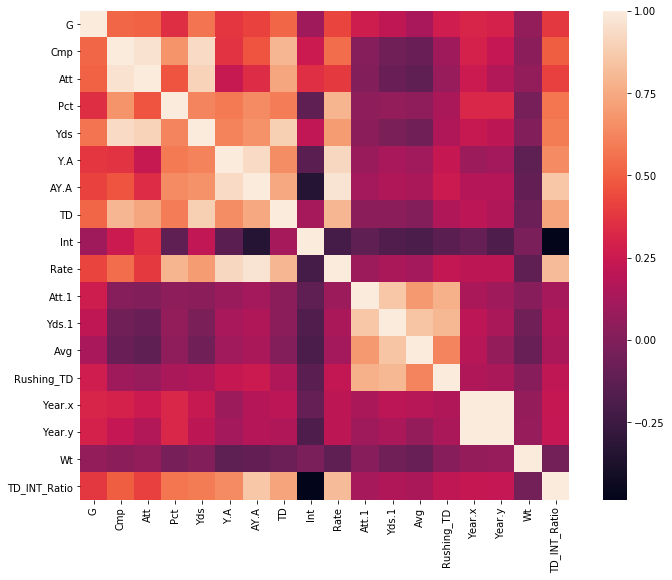

In [9]:
# Correlation matrix 
# seaborn
corrmat = df_viz.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

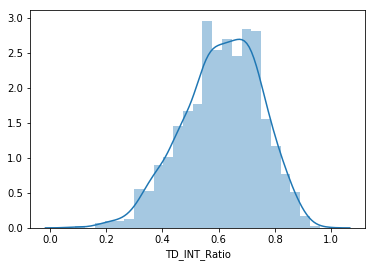

In [10]:
# Distrbution of Qb TDs
# seaborn
sns.distplot(df_viz.TD_INT_Ratio)

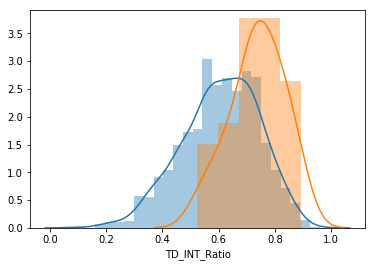

In [11]:
# Distrbution of Probowl and Non Probowl Qb Accuracy
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.TD_INT_Ratio)
sns.distplot(df_pb.TD_INT_Ratio)

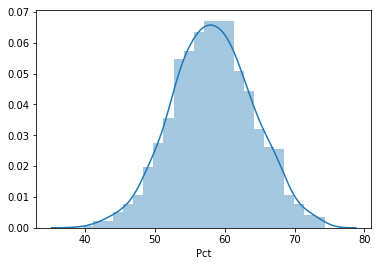

In [12]:
# Distrbution of Qb Accuracy
# seaborn
sns.distplot(df_viz.Pct)

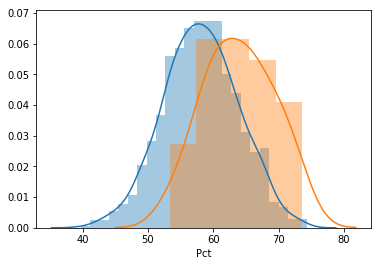

In [13]:
# Distrbution of Probowl and Non Probowl Qb Accuracy
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.Pct)
sns.distplot(df_pb.Pct)

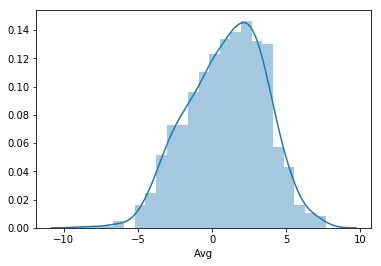

In [14]:
# Distrbution of sacked YPC Running
# seaborn
sns.distplot(df_viz.Avg)

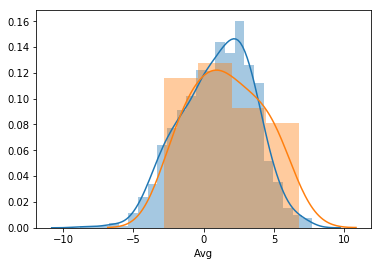

In [15]:
# Distrbution of Probowl and Non Probowl YPC Running 
# Tells you if they get sacked alot. In college for some reason sacks counts for ypc
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.Avg)
sns.distplot(df_pb.Avg)

In [16]:
# Scatter plot of Accuracy & TD for QBs
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl != 'Yes']

# creating trace1
trace1 = go.Scatter(
                    x = df_pb.Pct,
                    y = df_pb.TD,
                    mode = "markers",
                    name = "Probowl QB",
                    marker = dict(color = 'Green'),
                    text= df_pb.Player)
# creating trace2
trace2 = go.Scatter(
                    x = df_nopb.Pct,
                    y = df_nopb.TD,
                    mode = "markers",
                    name = "Non Probowl QB",
                    marker = dict(color = 'Yellow'),
                    text= df_nopb.Player)
# Layers of visual
data = [trace2, trace1]
# Layout
layout = dict(title = 'Accuracy & TD of Probowl vs Non Probowl QBs',
              xaxis= dict(title= 'Accuracy %',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TD',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig) #iplot for inline / plot for new html

In [17]:
# Number of Probowl QB by Conference
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_pb = df_pb.groupby(['Conf']).size().reset_index(name='counts').sort_values('counts',ascending = False)

df_nopb = df_viz[df_viz.Pro_bowl != 'Yes']
df_nopb = df_nopb.groupby(['Conf']).size().reset_index(name='counts').sort_values('counts',ascending = False)

# Creating trace1
trace1 = go.Bar(
                x = df_pb.Conf,
                y = df_pb.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)

# Create trace2
trace2 = go.Bar(
                x = df_nopb.Conf,
                y = df_nopb.counts,
                name = "Count of Non-Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)

# Layers of visual
data = [trace1,trace2]

# Layout
layout = go.Layout(
                   title = 'Probowlers By Conf',
                   barmode = 'stack',
                   yaxis = dict(title = 'Count by Conference')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

In [18]:
# Number of Probowl QB by Year
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_pb = df_pb.groupby(['Year.x']).size().reset_index(name='counts')

# Creating trace1
trace1 = go.Bar(
                x = df_pb['Year.x'],
                y = df_pb.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)


# Layers of visual
data = [trace1]

# Layout
layout = go.Layout(
                   title = 'Probowlers by Year',
                   xaxis = dict(tickmode = 'linear',tickangle=90),
                   yaxis = dict(title = 'Count by Year')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

In [19]:
# Number of Probowl QB by Height
# Plotly

df_phys = df_viz[['Player',
 'School.x',
 'Height',
 'Wt',
 'Pro_bowl',]]

df_phys = df_viz[df_viz.Pro_bowl == 'Yes']
df_phys = df_phys.groupby(['Height']).size().reset_index(name='counts')

# Creating trace1
trace1 = go.Bar(
                x = df_phys['Height'],
                y = df_phys.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)


# Layers of visual
data = [trace1]

# Layout
layout = go.Layout(
                   title = 'Probowlers by Height',
                   xaxis = dict(tickmode = 'linear'),
                   yaxis = dict(title = 'Count by Year')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

#### Dimensionality reduction: PCA

Principal Component Analysis (PCA) identifies the combination of 
attributes (principal components, or directions in the feature space)
that account for the most variance in the data.

Let's calculate the 2 first principal components of the training data,
and then create a scatter plot visualizing the training data examples
projected on the calculated components.

In [193]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [194]:
df_pca = df[['Player',
 'G',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'TD',
 'Int',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Pro_bowl',
 'TD_INT_Ratio']]

In [195]:
# Change Categorical Variable to integers
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['Yes'], 1)
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['No'], 0)

In [196]:
X = df_pca.drop(['Player','Pro_bowl'], axis=1).values
y = df_pca['Pro_bowl'].values.astype(np.int8)
target_names = np.sort(np.unique(y)) #np.unique(y)
labels = ["No Probowl", "ProBowl"]
print('\nThere are %d unique target values in this dataset:' % (len(target_names)), target_names)


There are 2 unique target values in this dataset: [0 1]


In [197]:
# Normalize each feature to unit norm (vector length)
X_normalized = normalize(X, axis=0)

In [198]:
n_comp = 5
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=100)
X_pca = pca.fit_transform(X_normalized)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9663
Individual variance contributions:
0.6753588514271796
0.13825986033081672
0.0800644211003611
0.044913355765337906
0.0276728204578518


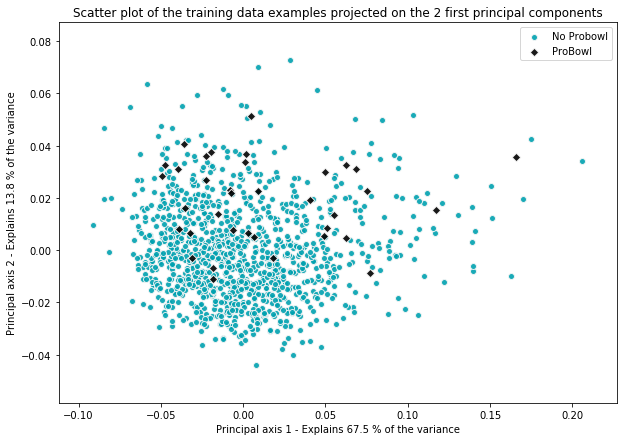

In [199]:
# Visualize PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
markers = ["o", "D"]
for class_ix, marker, color, label in zip(
        target_names, markers, colors, labels):
    ax.scatter(X_pca[np.where(y == class_ix), 0],
               X_pca[np.where(y == class_ix), 1],
               marker=marker, color=color, edgecolor='whitesmoke',
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title(
    "Scatter plot of the training data examples projected on the "
    "2 first principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[1] * 100.0))
plt.show()

#### SMOTE oversampling because of Class Imbalances

In [200]:
from imblearn.over_sampling import SMOTE

In [201]:
df_pca = df[['Player',
 'G',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'TD',
 'Int',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Pro_bowl',
 'TD_INT_Ratio']]

In [202]:
# Change Categorical Variable to integers
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['Yes'], 1)
df_pca['Pro_bowl'] = df_pca['Pro_bowl'].replace(['No'], 0)

In [203]:
X = df_pca.drop(['Player','Pro_bowl'], axis=1)
y = df_pca['Pro_bowl']

In [206]:
sm = SMOTE(random_state=12, ratio = 'minority')
X_res, y_res = sm.fit_sample(X, y)
print(y.value_counts(), np.bincount(y_res))

0    1152
1      36
Name: Pro_bowl, dtype: int64 [1152 1152]


In [209]:
target_names = np.sort(np.unique(y_res)) #np.unique(y)
labels = ["No Probowl", "ProBowl"]
print('\nThere are %d unique target values in this dataset:' % (len(target_names)), target_names)


There are 2 unique target values in this dataset: [0 1]


In [210]:
# Normalize each feature to unit norm (vector length)
X_normalized = normalize(X_res, axis=0)

In [211]:
n_comp = 5
# PCA
print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=100)
X_pca = pca.fit_transform(X_normalized)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 0.9746
Individual variance contributions:
0.719827689447361
0.11700859744845574
0.07431377106790792
0.04372486456138672
0.019703577515914658


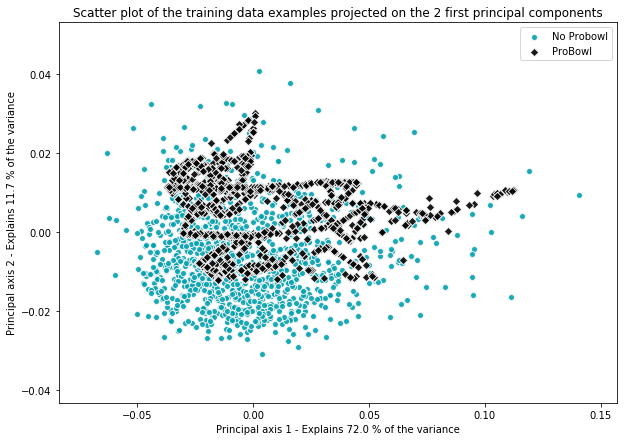

In [212]:
# Visualize PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
markers = ["o", "D"]
for class_ix, marker, color, label in zip(
        target_names, markers, colors, labels):
    ax.scatter(X_pca[np.where(y_res == class_ix), 0],
               X_pca[np.where(y_res == class_ix), 1],
               marker=marker, color=color, edgecolor='whitesmoke',
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title(
    "Scatter plot of the training data examples projected on the "
    "2 first principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
    pca.explained_variance_ratio_[1] * 100.0))
plt.show()

In [ ]:
## NEED TO REDO THE PCA ON TRAINING AND TEST SET